In [1]:
import pandas as pd
import georinex as gr
import misc
from plots import *
import copy

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from logparser import LogReader, PosReader, RinexReader

# Prepare the data

In [2]:
# Load log files
measurements_log = ['Raw', 'Fix']
measurements_RINEX = sum([[f"{y}{x}" for y in ['C', 'L', 'D', 'S']] for x in ['1C', '5Q', '2I', '5P']], [])
# measurements_RINEX = ['L1C', 'L5Q']
# # 'C1C', 'C5Q', 'C2I', 'C5P'

logs = []

device_folder = "../.data/2023_Dataset_Hervanta/S3_dynamic_hervanta/raw"
reference_folder = "../.data/2023_Dataset_Hervanta/S3_dynamic_hervanta/_reference/rover/"

rinex_ref = RinexReader('Reference', 
            filepath=f"{reference_folder}/NMND17420010S_2023-08-11_12-00-17.23O",
            tlim=[], meas=measurements_RINEX, sampling=1)

log = LogReader(manufacturer="Google", device="Pixel 7", specifiedTags=measurements_log, mode="mimir", 
                filepath=f"{device_folder}/log_GooglePixel7_20230811141817_modified.txt")
log.ref = rinex_ref
log.pos = PosReader(f"{reference_folder}/NMND17420010S_2023-08-11_12-00-17.pos")
logs.append(log)

log = LogReader(manufacturer="Google", device="Pixel Watch", specifiedTags=measurements_log, mode="mimir", 
                filepath=f"{device_folder}/log_GooglePixelWatch_20230811141922_modified.txt")
log.ref = rinex_ref
log.pos = PosReader(f"{reference_folder}/NMND17420010S_2023-08-11_12-00-17.pos")
logs.append(log)

log = LogReader(manufacturer="OnePlus", device="Nord 2", specifiedTags=measurements_log, mode="mimir", 
                filepath=f"{device_folder}/log_OnePlusNord2_20230811141819_modified.txt")
log.ref = rinex_ref
log.pos = PosReader(f"{reference_folder}/NMND17420010S_2023-08-11_12-00-17.pos")
logs.append(log)

log = LogReader(manufacturer="Samsung", device="A52", specifiedTags=measurements_log, mode="mimir", 
                filepath=f"{device_folder}/log_SamsungA52_20230811141745_modified.txt")
log.ref = rinex_ref
log.pos = PosReader(f"{reference_folder}/NMND17420010S_2023-08-11_12-00-17.pos")
logs.append(log)

log = LogReader(manufacturer="Xiaomi", device="11T", specifiedTags=measurements_log, mode="mimir", 
                filepath=f"{device_folder}/log_Xiaomi11_20230811141828_modified.txt")
log.ref = rinex_ref
log.pos = PosReader(f"{reference_folder}/NMND17420010S_2023-08-11_12-00-17.pos")
logs.append(log)

device_list = [log.device for log in logs]

In [3]:
log.raw.loc[log.raw['prn'].isin(['C20-L5']), ['CarrierFrequencyHz']]


CarrierFrequencyHz
datetime                                   
2023-08-11 11:19:00.721        1.176450e+09
2023-08-11 11:19:07.597        1.176450e+09
2023-08-11 11:19:08.599        1.176450e+09
2023-08-11 11:19:13.611        1.176450e+09
2023-08-11 11:19:15.623        1.176450e+09
...                                     ...
2023-08-11 11:59:55.699        1.176450e+09
2023-08-11 11:59:56.603        1.176450e+09
2023-08-11 11:59:57.619        1.176450e+09
2023-08-11 11:59:58.598        1.176450e+09
2023-08-11 11:59:59.651        1.176450e+09

[1136 rows x 1 columns]

In [4]:
log.pos.df

provider     timestamp   latitude  longitude  altitude
datetime                                                                  
2023-08-11 11:17:28      REF  1.691753e+09  61.449226  23.856271  163.0427
2023-08-11 11:17:29      REF  1.691753e+09  61.449226  23.856272  163.0478
2023-08-11 11:17:30      REF  1.691753e+09  61.449224  23.856279  162.9839
2023-08-11 11:17:31      REF  1.691753e+09  61.449224  23.856279  162.9672
2023-08-11 11:17:32      REF  1.691753e+09  61.449224  23.856279  162.9656
...                      ...           ...        ...        ...       ...
2023-08-11 12:00:13      REF  1.691755e+09  61.449223  23.856267  163.0055
2023-08-11 12:00:14      REF  1.691755e+09  61.449223  23.856267  163.0068
2023-08-11 12:00:15      REF  1.691755e+09  61.449223  23.856266  163.0008
2023-08-11 12:00:16      REF  1.691755e+09  61.449223  23.856267  163.0020
2023-08-11 12:00:17      REF  1.691755e+09  61.449223  23.856267  163.0052

[2507 rows x 5 columns]

In [5]:
log.ref.df

time   sv signal   doppler         phase   pseudorange  \
0      2023-08-11 11:17:46  C05     2I   -29.660  2.085740e+08  4.005444e+07   
1      2023-08-11 11:17:46  C06     2I   481.471  1.950053e+08  3.744872e+07   
2      2023-08-11 11:17:46  C09     2I  1004.410  1.977734e+08  3.798030e+07   
3      2023-08-11 11:17:46  C16     2I   309.883  1.972789e+08  3.788533e+07   
4      2023-08-11 11:17:46  C20     2I  3338.100  1.329851e+08  2.553840e+07   
...                    ...  ...    ...       ...           ...           ...   
116026 2023-08-11 12:00:35  R15     1C -2083.357  1.215335e+08  2.274341e+07   
116027 2023-08-11 12:00:35  R16     1C  1672.895  1.178705e+08  2.206568e+07   
116028 2023-08-11 12:00:35  R22     1C -3975.088  1.148802e+08  2.152100e+07   
116029 2023-08-11 12:00:35  R23     1C   -38.200  1.048804e+08  1.960636e+07   
116030 2023-08-11 12:00:35  R24     1C  3686.286  1.181037e+08  2.208605e+07   

           snr     prn system frequency  pseudorange_rate  pseudorange_error  \
0       39.652  C05-L1      C        L1               NaN                NaN   
1       45.316  C06-L1      C        L1               NaN                NaN   
2       46.057  C09-L1      C        L1               NaN                NaN   
3       47.809  C16-L1      C        L1               NaN                NaN   
4       42.997  C20-L1      C        L1               NaN                NaN   
...        ...     ...    ...       ...               ...                ...   
116026  45.770  R15-L1      R        L1           389.796              0.117   
116027  48.100  R16-L1      R        L1          -313.213              0.148   
116028  48.722  R22-L1      R        L1           744.642              0.079   
116029  49.365  R23-L1      R        L1             7.073              0.158   
116030  49.870  R24-L1      R        L1          -689.391              0.069   

        phase_rate  phase_error  doppler_error  
0              NaN          NaN            NaN  
1              NaN          NaN            NaN  
2              NaN          NaN            NaN  
3              NaN          NaN            NaN  
4              NaN          NaN            NaN  
...            ...          ...            ...  
116026    2082.939        0.683         -0.728  
116027   -1673.140        0.763         -0.359  
116028    3974.938        0.357         -0.322  
116029      37.816        0.792         -0.806  
116030   -3686.467        0.326         -0.378  

[116031 rows x 15 columns]

In [6]:
# only keep GPS provider
log.fix = log.fix.loc[log.fix["provider"] == 'GPS']

In [7]:
# Compute ENU errors
ref_enu = [61.44922404, 23.8562781, 162.711]
for log in logs:
    # Convert to ENU based on reference
    log.fix[["east", "north", "up"]] = log.fix.apply(
        lambda row: misc.convert2ENU(row['latitude'], row['longitude'], row['altitude'], ref_enu), 
        axis='columns', result_type='expand')

    # window = 1
    # log.pos.df["latitude_avg"] = log.pos.df["latitude"].rolling(window).mean()
    # log.pos.df["longitude_avg"] = log.pos.df["longitude"].rolling(window).mean()
    # log.pos.df["altitude_avg"] = log.pos.df["altitude"].rolling(window).mean()

    log.pos.df[["east", "north", "up"]] = log.pos.df.apply(
        lambda row: misc.convert2ENU(row['latitude'], row['longitude'], row['altitude'], ref_enu), 
        axis='columns', result_type='expand')

    # Align/interpolates dataframes
    pos_A, pos_B = log.fix[["east", "north", "up"]].align(log.pos.df[["east", "north", "up"]])
    log.diff = pos_B.interpolate(method='time') - pos_A.interpolate(method='time')
    log.diff.dropna(how='all', inplace=True)
    
    log.diff[["2D_error"]] = log.diff.apply(
        lambda row: misc.getHorizontalError(row['east'], row['north']), 
        axis='columns', result_type='expand')
    
    log.diff[["3D_error"]] = log.diff.apply(
        lambda row: misc.get3DError(row['east'], row['north'], row['up']), 
        axis='columns', result_type='expand')

    print(f"--- {log.device} ---")
    print(log.diff[["east", "north", "up", "2D_error", "3D_error"]].describe())

--- Pixel 7 ---
              east        north           up     2D_error     3D_error
count  3197.000000  3197.000000  3197.000000  3197.000000  3197.000000
mean     -0.433653     1.039903    -5.256179     4.808352     8.045245
std       3.358815     4.977397     5.615357     3.768088     5.634540
min     -12.885867   -18.699439   -58.160129     0.037139     1.187774
25%      -3.223432    -1.478974    -7.219325     2.293000     4.705297
50%      -0.590096     1.034349    -4.538660     3.933780     6.496942
75%       1.562022     2.753046    -2.937313     5.971326     9.846083
max      17.051928    37.414857    41.998857    37.414858    59.162972
--- Pixel Watch ---
              east        north           up     2D_error     3D_error
count  3034.000000  3034.000000  3034.000000  3034.000000  3034.000000
mean     -0.024106     1.809750    -0.660963     3.615837     5.493344
std       2.289765     4.550593     5.497811     4.018605     5.450132
min      -8.231396   -23.304039   -52.988

In [8]:
log.diff

east      north          up   2D_error  \
datetime                                                               
2023-08-11 11:19:06.092 -13.577256  58.209960 -153.937111  59.772413   
2023-08-11 11:19:07.000 -19.825691  45.839596 -128.879587  49.943234   
2023-08-11 11:19:08.000 -26.707602  32.213841 -101.290295  41.845281   
2023-08-11 11:19:09.000 -33.589406  18.589423  -73.700303  38.390296   
2023-08-11 11:19:10.000 -40.475478   4.968683  -46.118811  40.779310   
...                            ...        ...         ...        ...   
2023-08-11 12:00:13.000   0.727708   2.048481   -5.694500   2.173898   
2023-08-11 12:00:14.000   0.725094   2.047701   -5.693200   2.172289   
2023-08-11 12:00:15.000   0.696289   2.047812   -5.699200   2.162950   
2023-08-11 12:00:16.000   0.719706   2.046252   -5.698000   2.169130   
2023-08-11 12:00:17.000   0.731335   2.048035   -5.694800   2.174695   

                           3D_error  
datetime                             
2023-08-11 11:19:06.092  165.134416  
2023-08-11 11:19:07.000  138.218213  
2023-08-11 11:19:08.000  109.593573  
2023-08-11 11:19:09.000   83.099636  
2023-08-11 11:19:10.000   61.562138  
...                             ...  
2023-08-11 12:00:13.000    6.095339  
2023-08-11 12:00:14.000    6.093551  
2023-08-11 12:00:15.000    6.095837  
2023-08-11 12:00:16.000    6.096911  
2023-08-11 12:00:17.000    6.095904  

[2441 rows x 5 columns]

# Results

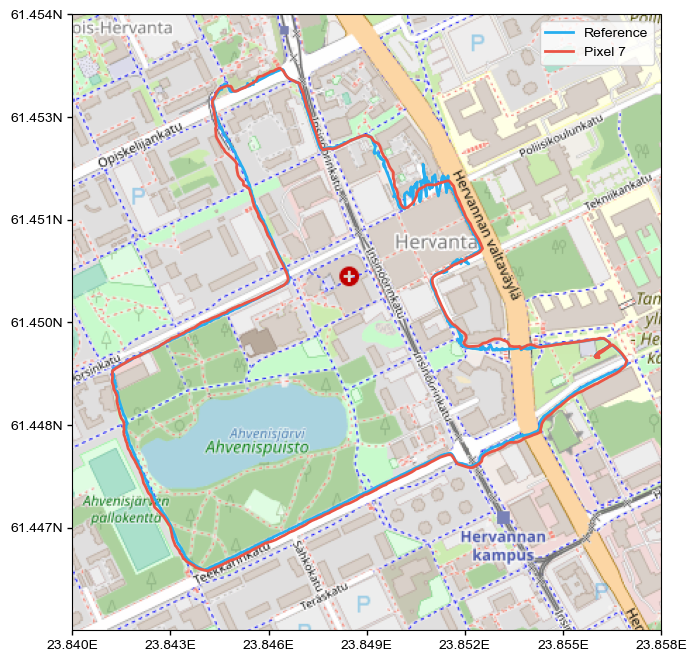

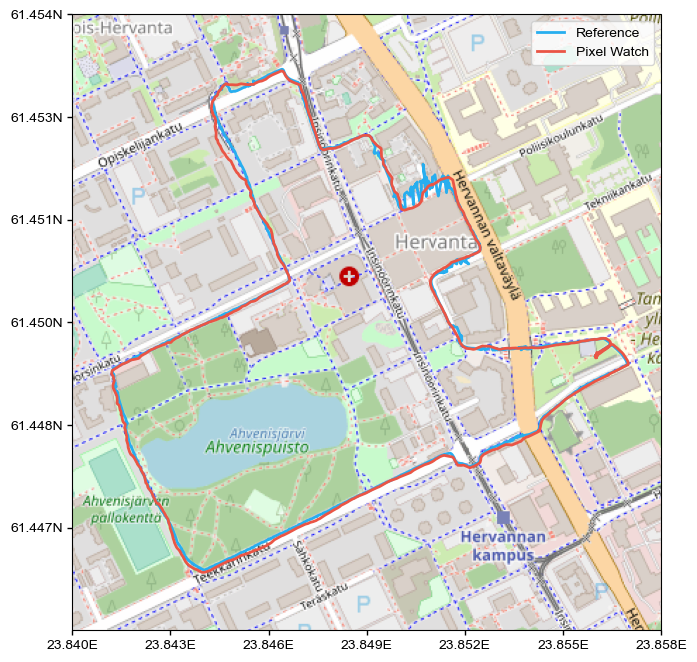

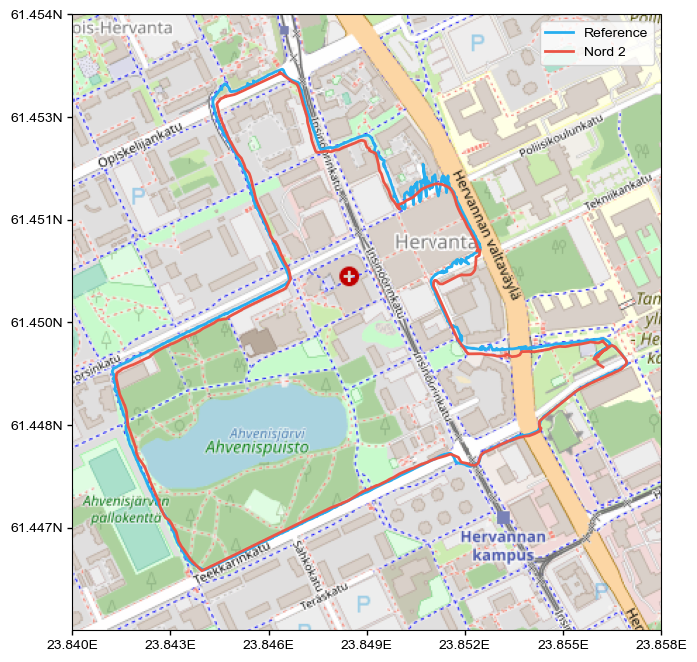

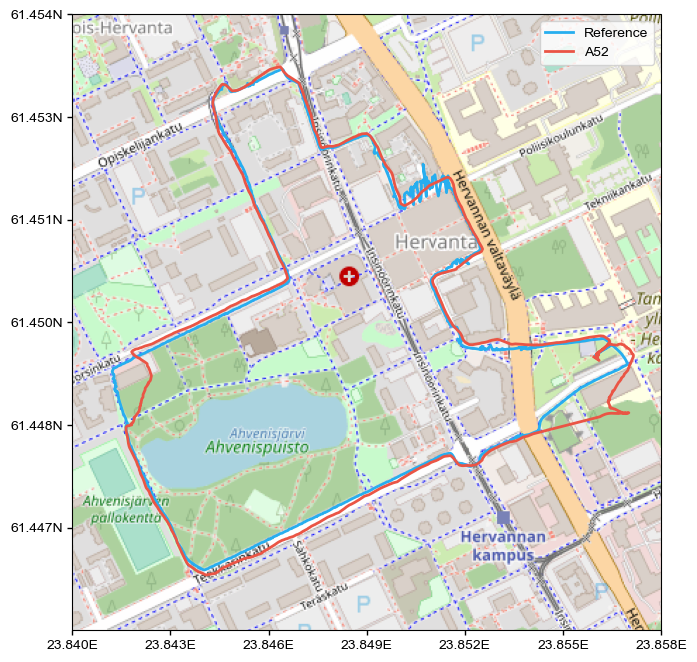

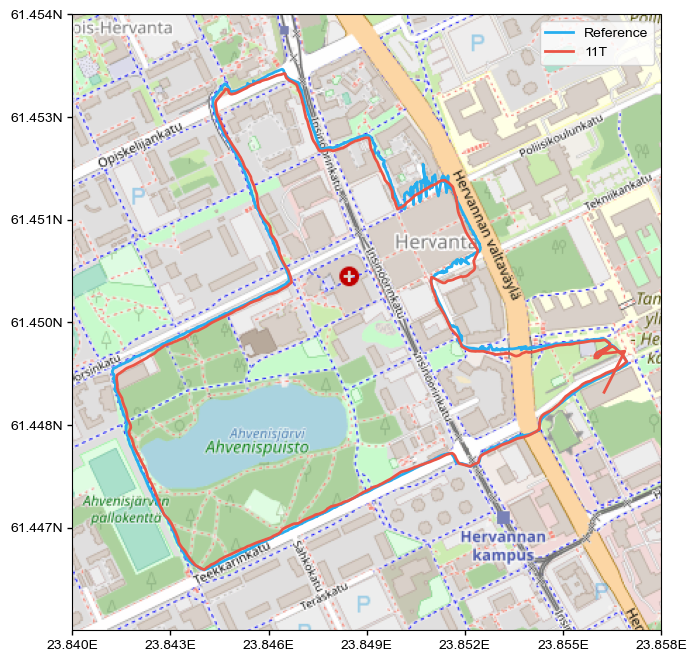

In [49]:
center = ref_enu[:2]
extent = [center[1] - 0.016, center[1] + 0.002, center[0] - 0.004, center[0] + 0.005]
for log in logs:
    locations = {}
    locations['Reference'] = log.pos.df[["latitude", "longitude"]]
    locations[log.device] = log.fix.loc[log.fix['provider'].isin(['GPS']), ["latitude", "longitude"]]
    plotMap(locations=locations, extent=extent, scale=15)

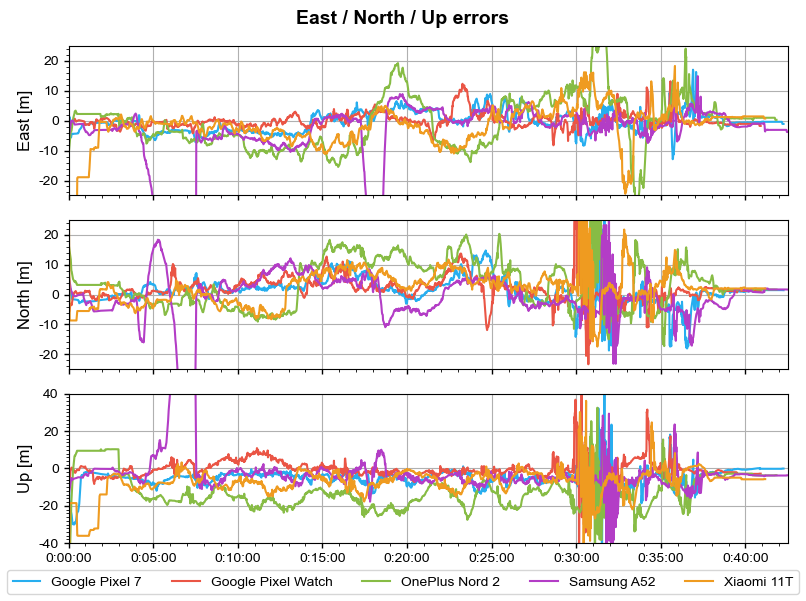

In [52]:
plotENU(logs, lim=[25,25,40], ticks=[2, 10, 2, 10, 2, 20], mode='difference')

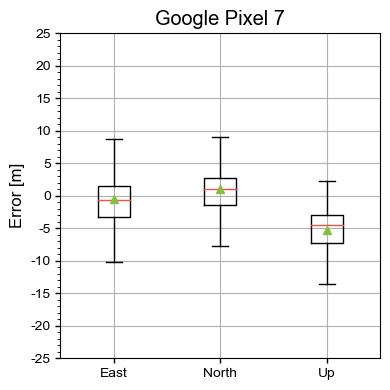

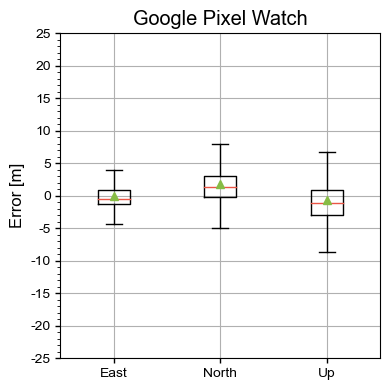

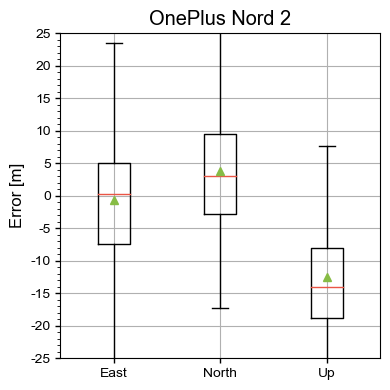

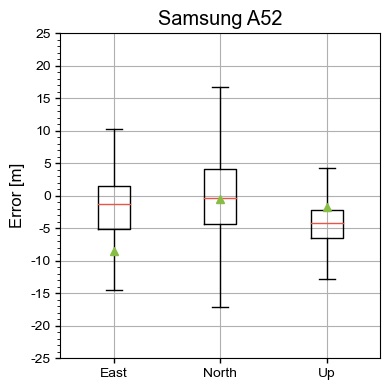

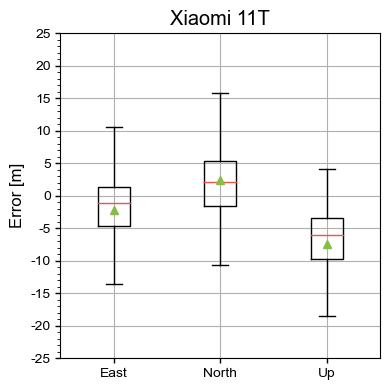

In [12]:
plotStatisticsENU(logs, mode='box', lim=25, ticks=[1, 5])

### Visibility

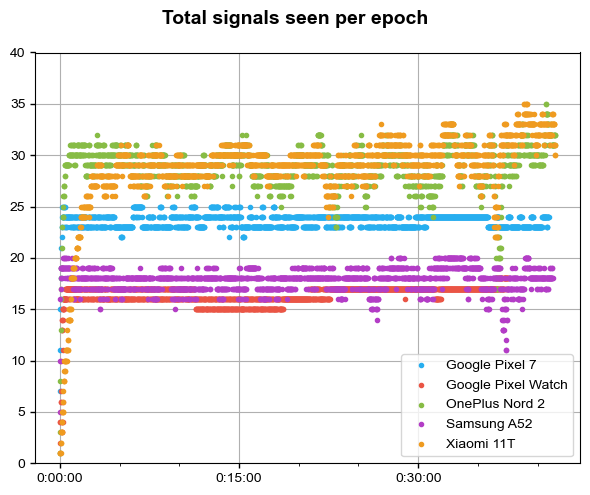

In [13]:
plotTotalSignalsPerEpochs(logs, lim=[0, 40], ticks=[300, 900], mode='signal')

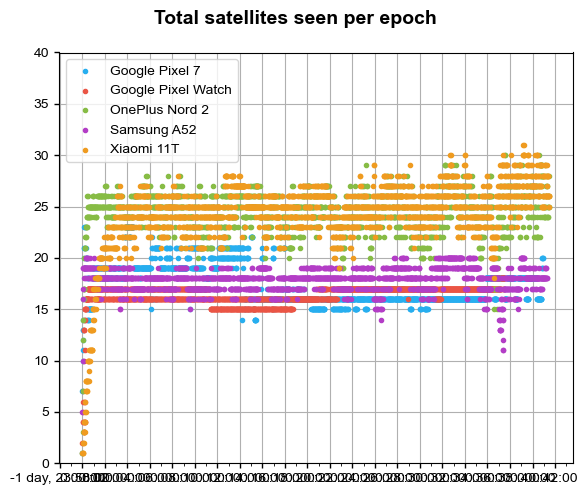

In [14]:
plotTotalSignalsPerEpochs(logs, lim=[0, 40], ticks=[60, 120], mode='satellite')

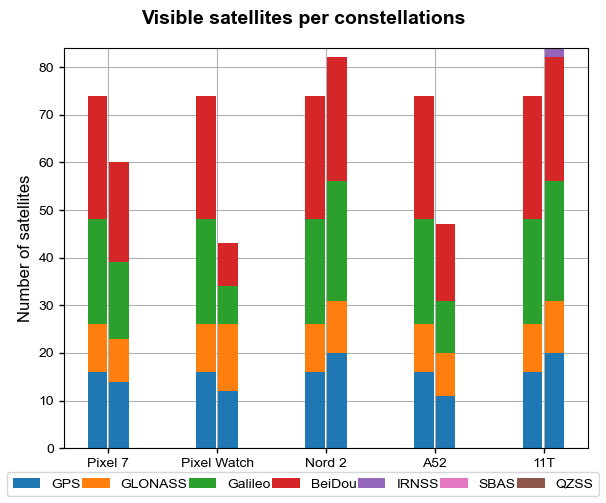

In [15]:
plotBarSatellitesPerSystem(logs)

In [16]:
statsSatellitesPerSystem(logs)

device   G  G_ref   R  R_ref   E  E_ref   C  C_ref  I  I_ref  S  \
0      Pixel 7  14     16   9     10  16     22  21     26  0      0  0   
1  Pixel Watch  12     16  14     10   8     22   9     26  0      0  0   
2       Nord 2  20     16  11     10  25     22  26     26  0      0  0   
3          A52  11     16   9     10  11     22  16     26  0      0  0   
4          11T  20     16  11     10  25     22  26     26  2      0  0   

   S_ref  J  J_ref  
0      0  0      0  
1      0  0      0  
2      0  0      0  
3      0  0      0  
4      0  0      0

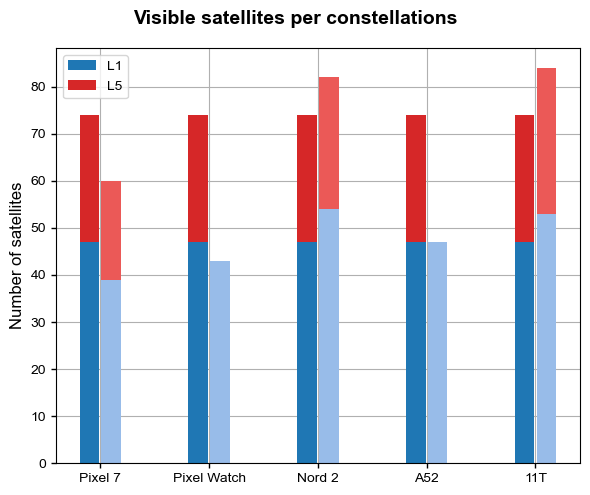

In [17]:
plotBarSatellitesPerFrequency(logs)

In [18]:
statsSatellitesPerFrequency(logs)

device  L1  L1_ref  L5  L5_ref
0      Pixel 7  39      47  21      27
1  Pixel Watch  43      47   0      27
2       Nord 2  54      47  28      27
3          A52  47      47   0      27
4          11T  53      47  31      27

### Measurements

Pseudoranges

In [19]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    log.raw = misc.filterValues(log.raw, 'PseudorangeAcceleration', 300)
    log.raw[list(misc.GnssState_Str.values())] = log.raw.apply(lambda row: misc.getSplitState(row['State'], bits=17, type='tracking'), axis='columns', result_type='expand')
    stats.append(log.raw['PseudorangeAcceleration'].describe(percentiles=[0.5, .667, .95, .997]))
stats = pd.concat(stats, keys=device_list, axis=1).T
stats


--- Pixel 7 ---
Rows removed 12 (0.022%)
--- Pixel Watch ---
Rows removed 69 (0.191%)
--- Nord 2 ---
Rows removed 42 (0.060%)
--- A52 ---
Rows removed 3 (0.007%)
--- 11T ---
Rows removed 3 (0.004%)


count      mean        std         min       50%     66.7%  \
Pixel 7      55541.0  0.105540  10.293486 -243.123626  0.101814  1.432021   
Pixel Watch  36039.0  0.095473  16.888374 -287.794451  0.089772  1.867729   
Nord 2       69995.0 -0.023267   4.985501 -155.842295 -0.006655  0.548927   
A52          44008.0  0.122815  14.754489 -282.783367  0.108926  1.583686   
11T          67204.0  0.393620  22.108858 -280.576701  0.063933  2.831076   

                   95%       99.7%         max  
Pixel 7      14.093155   44.380072  264.024808  
Pixel Watch  19.238422   89.034165  277.366452  
Nord 2        6.219075   22.781825  137.541019  
A52          17.579473   72.645691  297.405057  
11T          32.950277  103.475726  269.135296

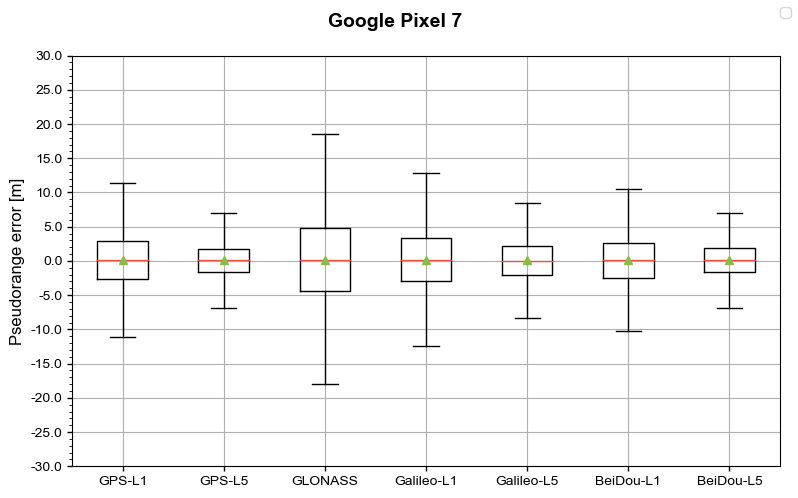

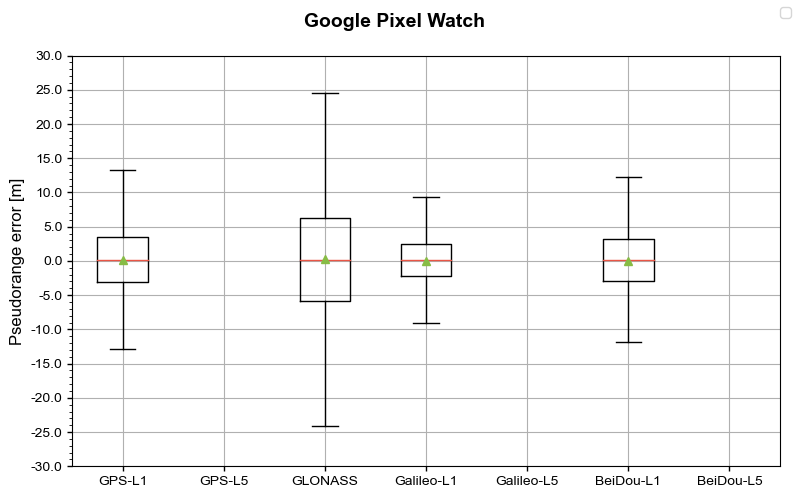

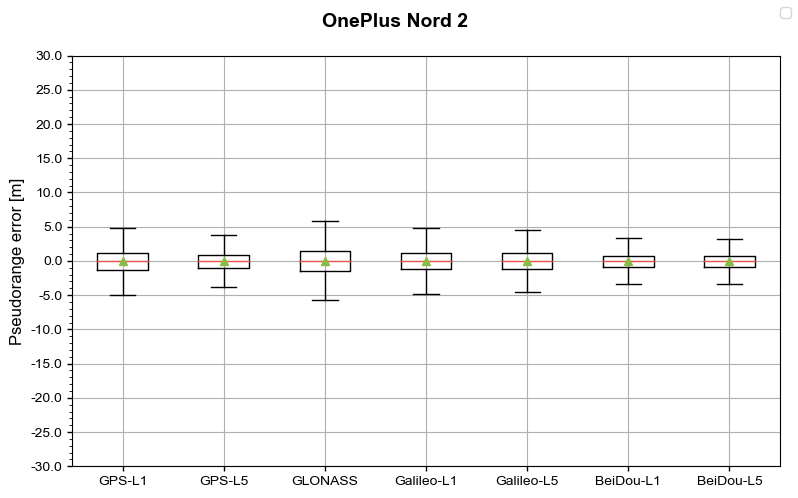

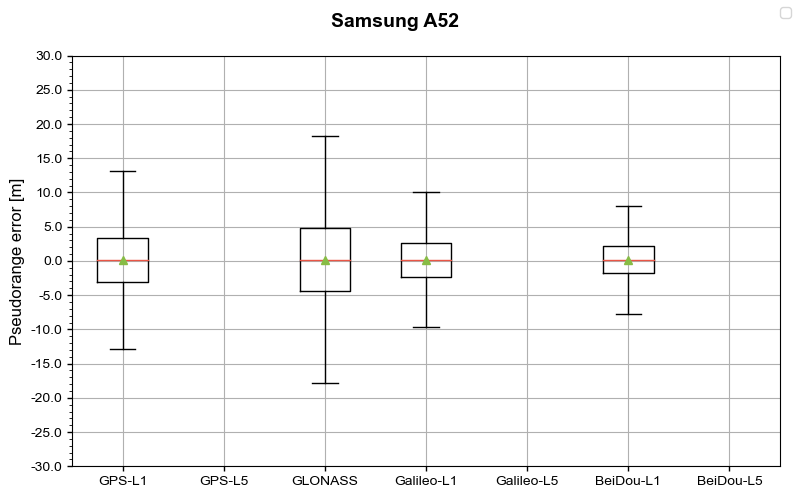

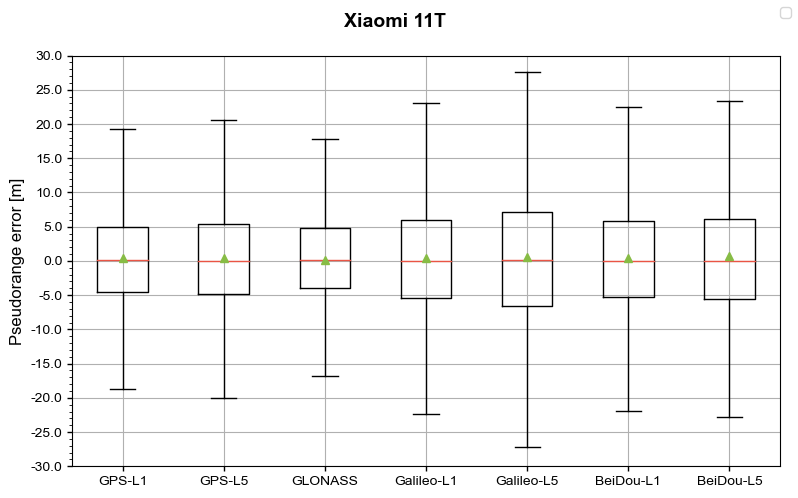

In [20]:

plotStatisticsDataBox(_logs, 
                      'PseudorangeAcceleration', 
                      'Pseudorange error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=30,
                      ticks=[1,5])


In [21]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    log.ref.df = misc.filterValues(log.ref.df, 'pseudorange_error', 300)
    stats.append(log.ref.df['pseudorange_error'].describe(percentiles=[0.5, .667, .95, .997]))
stats = pd.concat(stats, keys=device_list, axis=1).T
stats


--- Pixel 7 ---
Rows removed 6280 (5.419%)
--- Pixel Watch ---
Rows removed 0 (0.000%)
--- Nord 2 ---
Rows removed 0 (0.000%)
--- A52 ---
Rows removed 0 (0.000%)
--- 11T ---
Rows removed 0 (0.000%)


count      mean        std      min    50%  66.7%     95%  \
Pixel 7      109603.0  0.124944  18.945338 -299.097  0.074  0.117  0.6339   
Pixel Watch  109603.0  0.124944  18.945338 -299.097  0.074  0.117  0.6339   
Nord 2       109603.0  0.124944  18.945338 -299.097  0.074  0.117  0.6339   
A52          109603.0  0.124944  18.945338 -299.097  0.074  0.117  0.6339   
11T          109603.0  0.124944  18.945338 -299.097  0.074  0.117  0.6339   

                  99.7%      max  
Pixel 7      142.939462  299.505  
Pixel Watch  142.939462  299.505  
Nord 2       142.939462  299.505  
A52          142.939462  299.505  
11T          142.939462  299.505

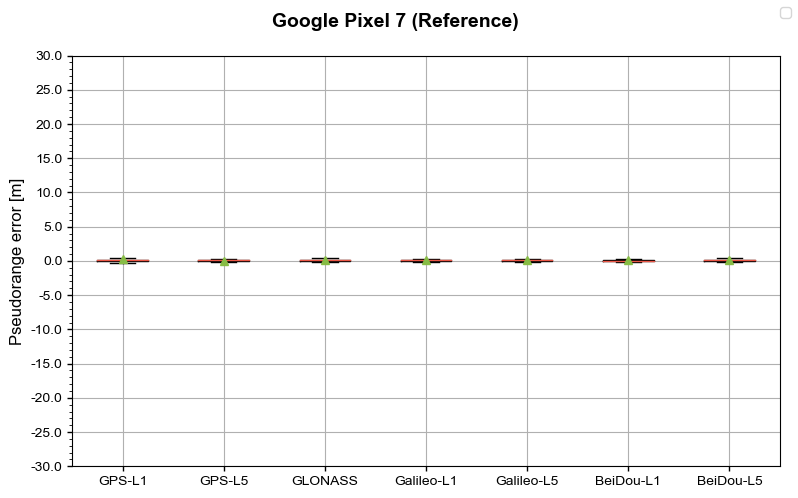

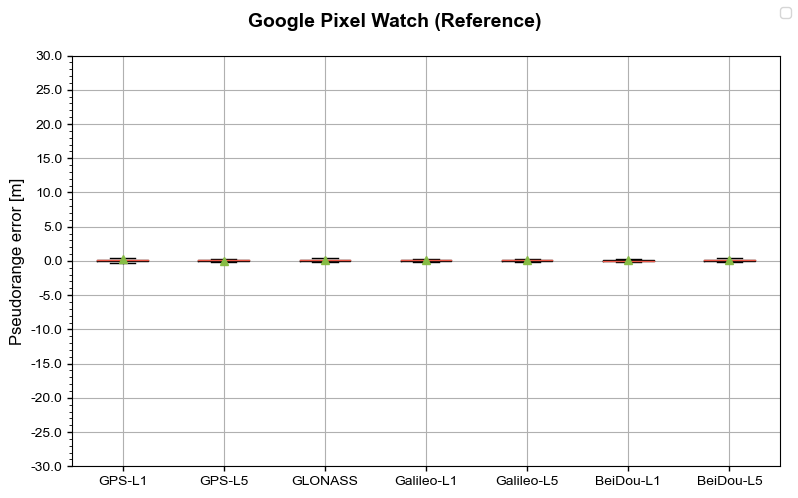

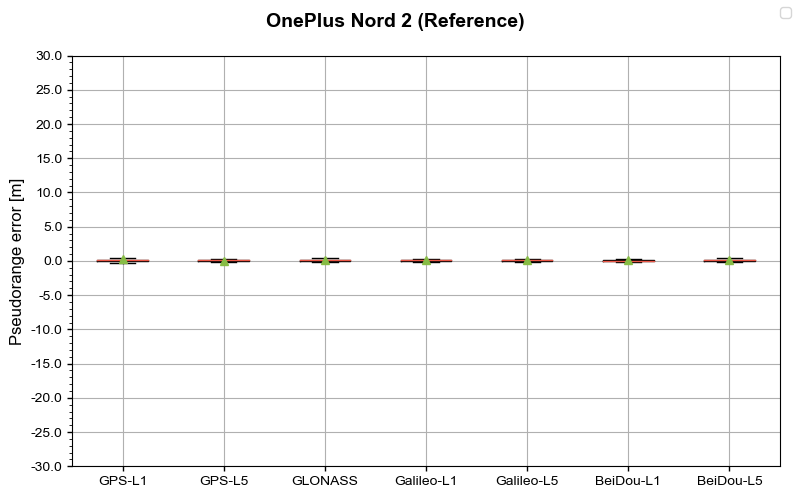

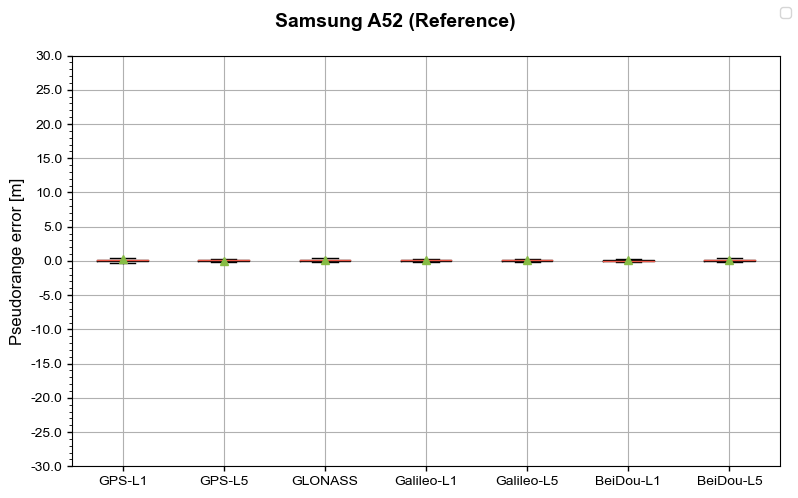

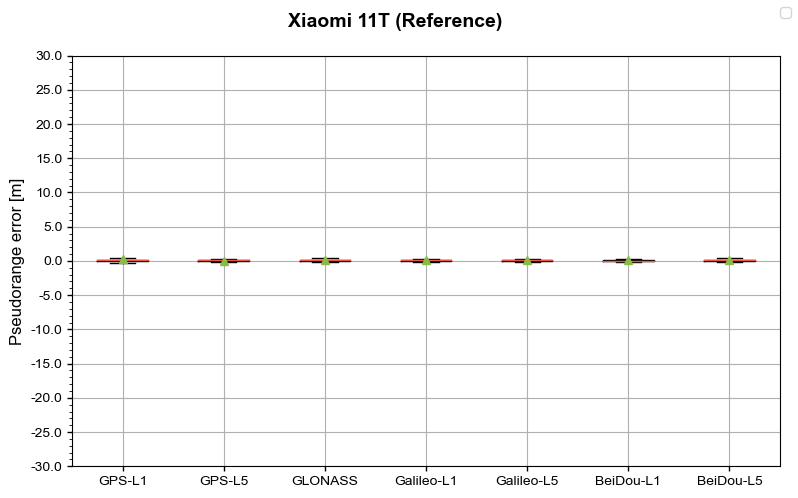

In [22]:

plotStatisticsDataBox(_logs, 
                      'pseudorange_error', 
                      'Pseudorange error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=30,
                      ticks=[1,5],
                      mode='ref')


In [23]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    log.raw[list(misc.GnssState_Str.values())] = log.raw.apply(lambda row: misc.getSplitState(row['State'], bits=17, type='tracking'), axis='columns', result_type='expand')
    count = log.raw[list(misc.GnssState_Str.values())].count()
    stats.append(log.raw[list(misc.GnssState_Str.values())].sum().div(count))
stats = pd.concat(stats, keys=device_list, axis=1)
stats

Pixel 7  Pixel Watch    Nord 2       A52  \
TRACK_UNKNOWN                0.000000     0.000000  0.000000  0.000000   
TRACK_CODE_LOCK              0.796581     0.622674  1.000000  1.000000   
TRACK_BIT_SYNC               0.858063     0.816309  0.699555  0.999683   
TRACK_SUBFRAME_SYNC          0.487535     0.471430  0.552515  0.998506   
TRACK_TOW_DECODED            0.370943     0.542483  0.828105  0.998506   
TRACK_MSEC_AMBIGUOUS         0.011378     0.001070  0.024854  0.000000   
TRACK_SYMBOL_SYNC            0.858978     0.816414  0.699555  0.001177   
TRACK_GLO_STRING_SYNC        0.148964     0.251821  0.147041  0.214417   
TRACK_GLO_TOD_DECODED        0.140349     0.208645  0.147041  0.214417   
TRACK_BDS_D2_BIT_SYNC        0.000069     0.000000  0.000000  0.000000   
TRACK_BDS_D2_SUBFRAME_SYNC   0.000000     0.000000  0.275590  0.000000   
TRACK_GAL_E1BC_CODE_LOCK     0.124689     0.176303  0.000000  0.248783   
TRACK_GAL_E1C_2ND_CODE_LOCK  0.193439     0.137331  0.000000  0.248647   
TRACK_GAL_E1B_PAGE_SYNC      0.034030     0.084575  0.000000  0.248557   
TRACK_SBAS_SYNC              0.000000     0.000000  0.000000  0.000000   
TRACK_TOW_KNOWN              0.820546     0.736015  0.817963  0.998506   
TRACK_GLO_TOD_KNOWN          0.147548     0.262732  0.147041  0.214417   
TRACK_S_2ND_CODE_LOCK        0.566436     0.298259  0.000000  0.000000   

                                  11T  
TRACK_UNKNOWN                0.000000  
TRACK_CODE_LOCK              1.000000  
TRACK_BIT_SYNC               0.657599  
TRACK_SUBFRAME_SYNC          0.523744  
TRACK_TOW_DECODED            0.807455  
TRACK_MSEC_AMBIGUOUS         0.058690  
TRACK_SYMBOL_SYNC            0.657599  
TRACK_GLO_STRING_SYNC        0.133855  
TRACK_GLO_TOD_DECODED        0.133855  
TRACK_BDS_D2_BIT_SYNC        0.000000  
TRACK_BDS_D2_SUBFRAME_SYNC   0.283711  
TRACK_GAL_E1BC_CODE_LOCK     0.000000  
TRACK_GAL_E1C_2ND_CODE_LOCK  0.000000  
TRACK_GAL_E1B_PAGE_SYNC      0.000000  
TRACK_SBAS_SYNC              0.000000  
TRACK_TOW_KNOWN              0.803382  
TRACK_GLO_TOD_KNOWN          0.133855  
TRACK_S_2ND_CODE_LOCK        0.000000

Doppler

In [24]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    log.raw = misc.filterValues(log.raw, 'DopplerError', 30)
    #log.raw = misc.filterPercentile(log.raw, 'DopplerError', 0.997)
    stats.append(log.raw['DopplerError'].describe(percentiles=[0.5, .667, .95, .997]).T)
stats = pd.concat(stats, keys=device_list, axis=1).T
stats


--- Pixel 7 ---
Rows removed 8 (0.014%)
--- Pixel Watch ---
Rows removed 0 (0.000%)
--- Nord 2 ---
Rows removed 1 (0.001%)
--- A52 ---
Rows removed 0 (0.000%)
--- 11T ---
Rows removed 0 (0.000%)


count      mean       std        min       50%     66.7%  \
Pixel 7      57852.0  0.078776  0.399900  -9.536620  0.075058  0.155719   
Pixel Watch  38266.0  0.082643  0.392799 -11.612106  0.081802  0.175388   
Nord 2       71897.0 -0.046639  1.328623 -24.589798 -0.022335  0.279051   
A52          44124.0  0.073247  0.735982 -10.523764  0.066348  0.309861   
11T          71598.0  0.034706  0.821338 -15.820492  0.095356  0.317590   

                  95%     99.7%        max  
Pixel 7      0.611597  1.586880  29.153364  
Pixel Watch  0.616633  1.686610   9.242383  
Nord 2       1.733796  4.891873  20.666477  
A52          1.224343  2.969236   6.519741  
11T          1.132766  2.892986  15.941162

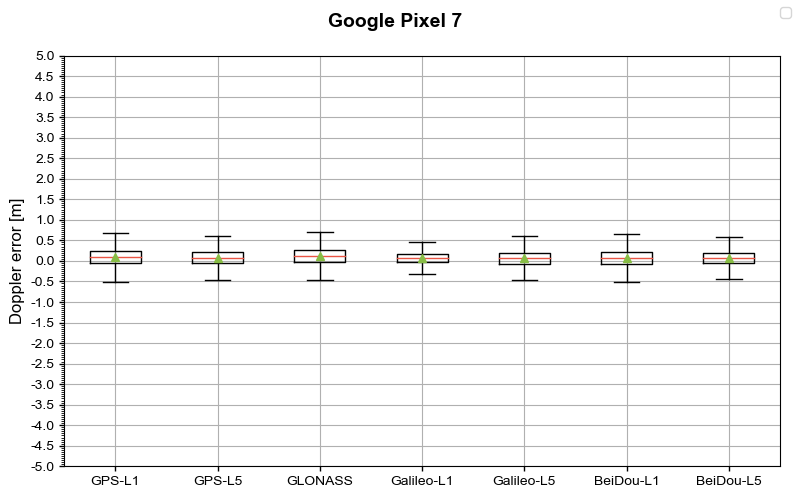

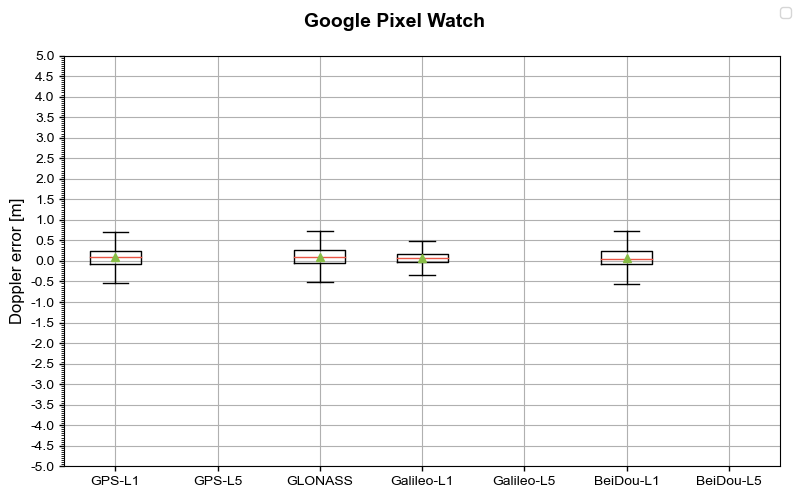

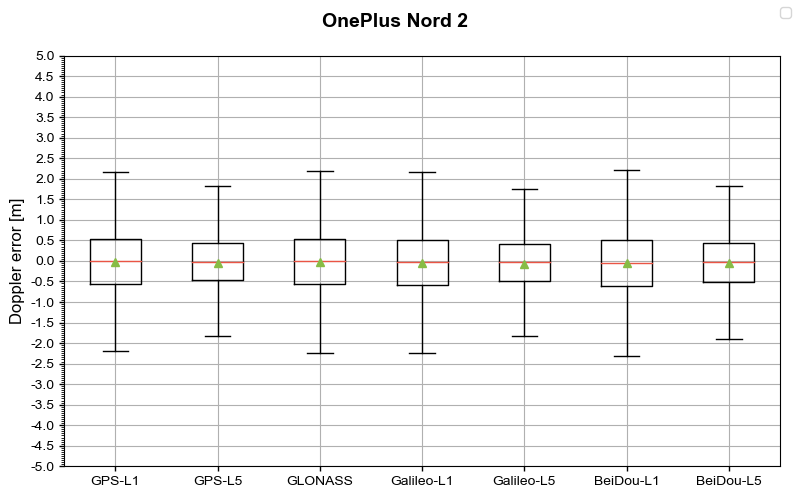

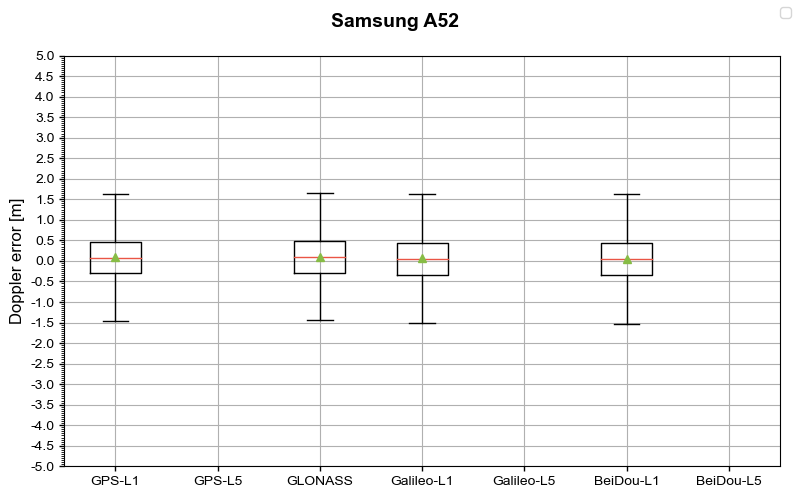

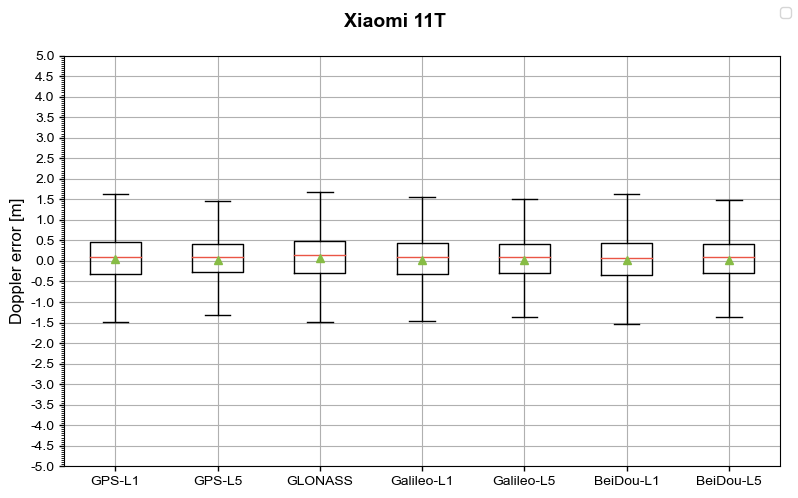

In [25]:

plotStatisticsDataBox(_logs, 
                      'DopplerError', 
                      'Doppler error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=5,
                      ticks=[0.05,0.5])

In [26]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    log.ref.df = misc.filterValues(log.ref.df, 'doppler_error', 30)
    #log.raw = misc.filterPercentile(log.raw, 'DopplerError', 0.997)
    stats.append(log.ref.df['doppler_error'].describe(percentiles=[0.5, .667, .95, .997]).T)
    stats.append(log.ref.df['doppler_error'].describe(percentiles=[0.5, .667, .95, .997]).T)
stats = pd.concat(stats, keys=device_list, axis=1).T
stats


--- Pixel 7 ---
Rows removed 63 (0.054%)
--- Pixel Watch ---
Rows removed 0 (0.000%)
--- Nord 2 ---
Rows removed 0 (0.000%)
--- A52 ---
Rows removed 0 (0.000%)
--- 11T ---
Rows removed 0 (0.000%)


count      mean       std    min    50%  66.7%      95%  \
Pixel 7      115894.0 -0.427136  1.897533 -29.98 -0.337  0.048  1.93235   
Pixel Watch  115894.0 -0.427136  1.897533 -29.98 -0.337  0.048  1.93235   
Nord 2       115894.0 -0.427136  1.897533 -29.98 -0.337  0.048  1.93235   
A52          115894.0 -0.427136  1.897533 -29.98 -0.337  0.048  1.93235   
11T          115894.0 -0.427136  1.897533 -29.98 -0.337  0.048  1.93235   

                99.7%     max  
Pixel 7      6.712963  27.478  
Pixel Watch  6.712963  27.478  
Nord 2       6.712963  27.478  
A52          6.712963  27.478  
11T          6.712963  27.478

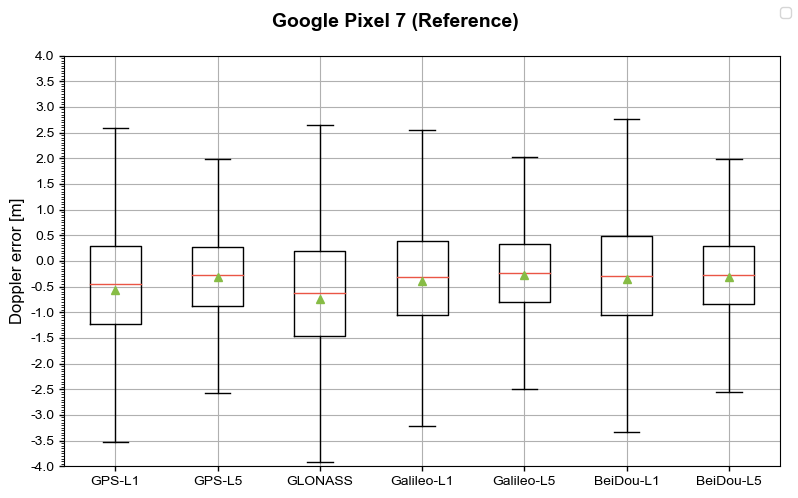

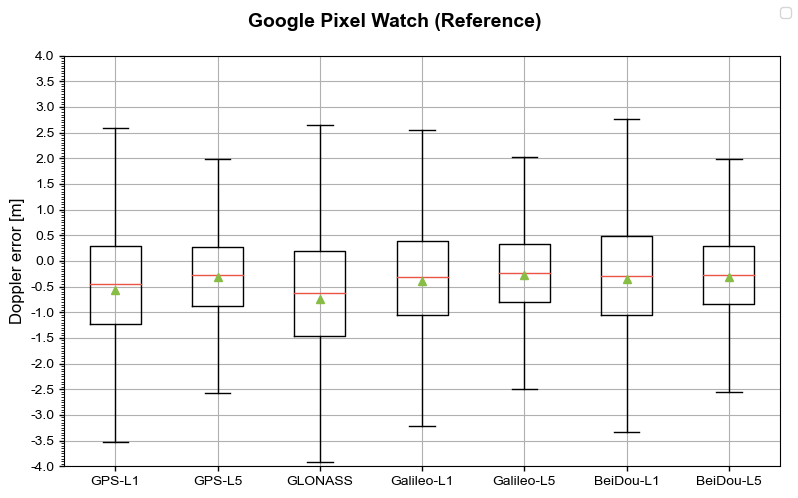

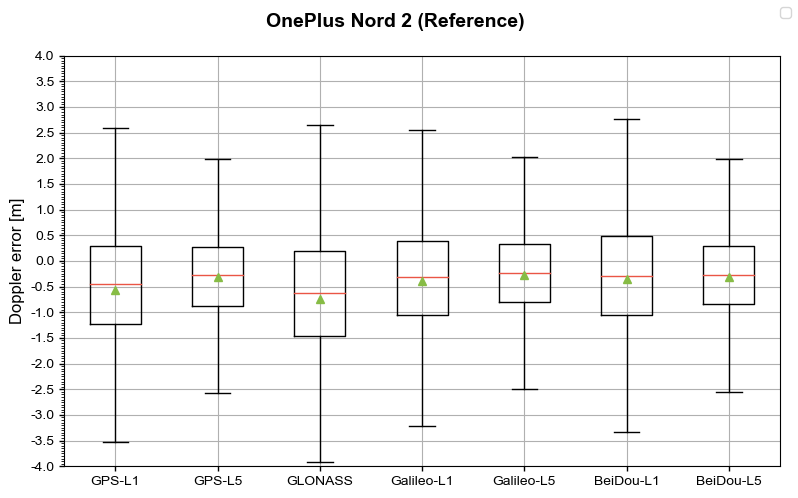

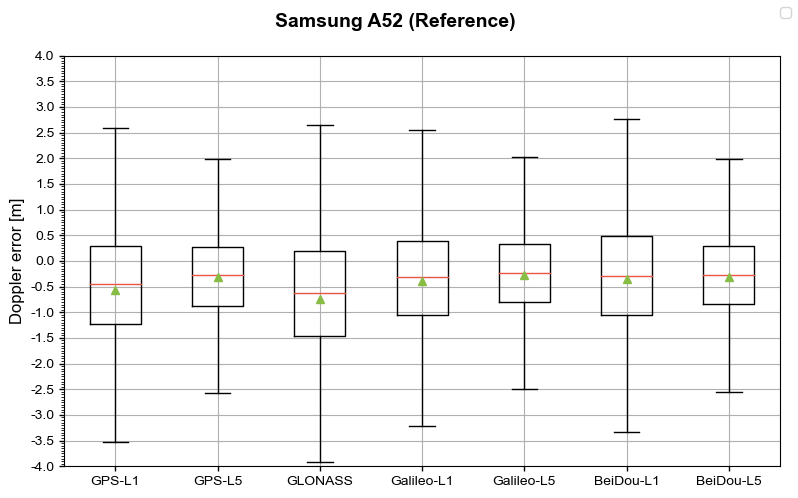

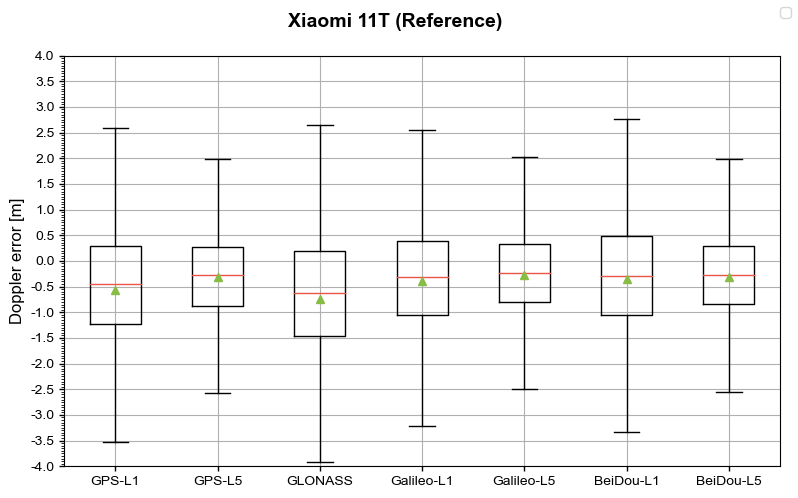

In [27]:

plotStatisticsDataBox(_logs, 
                      'doppler_error', 
                      'Doppler error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=4,
                      ticks=[0.05,0.5],
                      mode='ref')

Phases

In [28]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    #log.raw = misc.filterPercentile(log.raw, 'PhaseError', 0.997)
    log.raw = misc.filterValues(log.raw, 'PhaseError', 3)
    stats.append(log.raw['PhaseError'].describe(percentiles=[0.5, .667, .95, .997]).T)
stats = pd.concat(stats, keys=device_list, axis=1).T
stats

--- Pixel 7 ---
Rows removed 971 (1.680%)
--- Pixel Watch ---
Rows removed 338 (0.884%)
--- Nord 2 ---
Rows removed 1927 (2.683%)
--- A52 ---
Rows removed 0 (0.000%)
--- 11T ---
Rows removed 1315 (1.839%)


count      mean       std       min       50%     66.7%  \
Pixel 7      56829.0  0.090614  0.562846 -2.989248  0.078470  0.149883   
Pixel Watch  37887.0  0.095424  0.605072 -2.990241  0.081222  0.203636   
Nord 2       69890.0 -0.033710  0.541149 -2.997616  0.007045  0.134217   
A52          44077.0  0.000000  0.000000  0.000000  0.000000  0.000000   
11T          70199.0  0.061801  0.637191 -2.975215  0.114623  0.290832   

                  95%     99.7%       max  
Pixel 7      0.977986  2.559517  2.990022  
Pixel Watch  1.107179  2.495915  2.990819  
Nord 2       0.734826  2.054615  2.991065  
A52          0.000000  0.000000  0.000000  
11T          1.001533  2.145454  2.999652

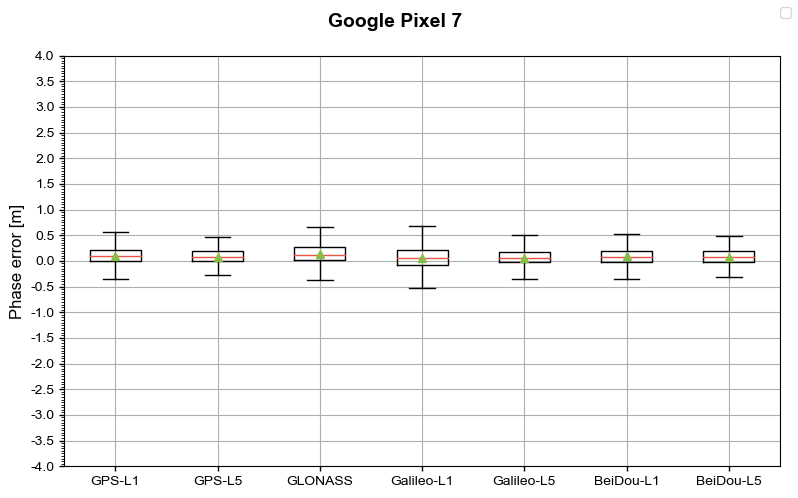

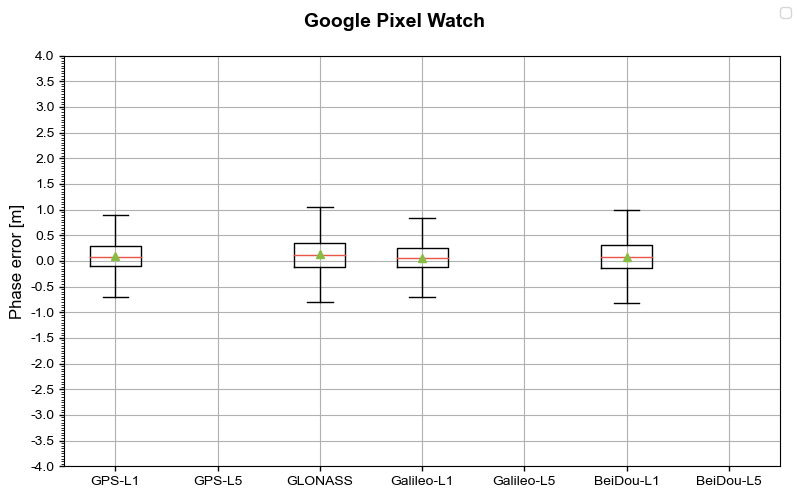

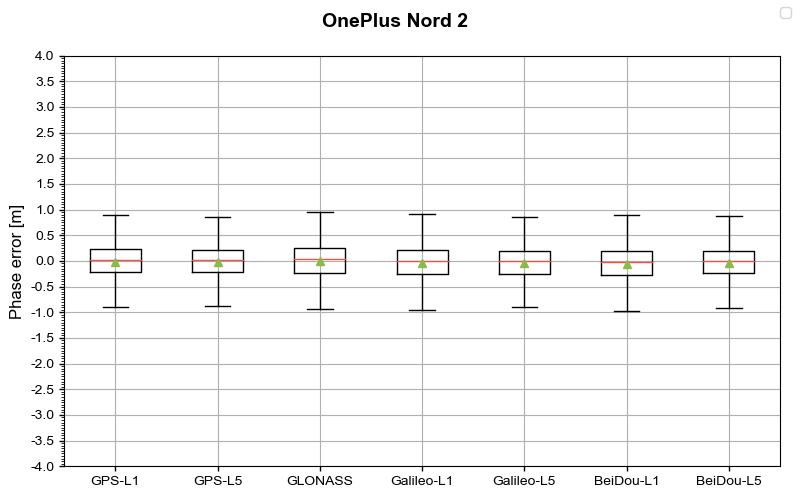

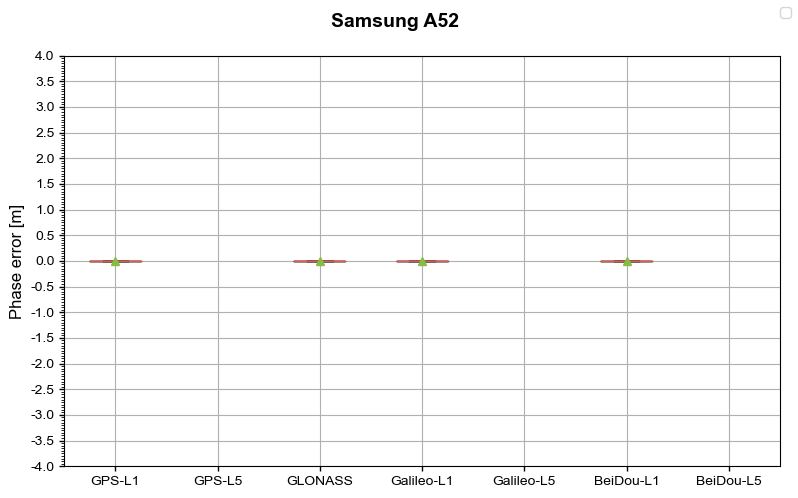

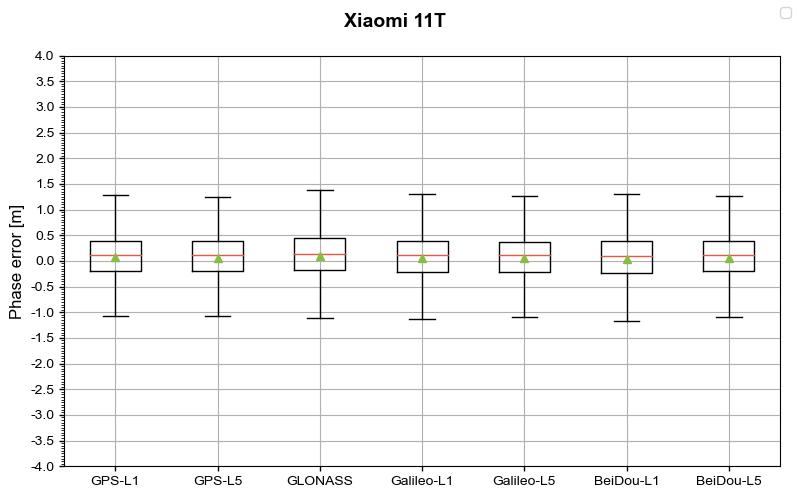

In [29]:

plotStatisticsDataBox(_logs, 
                      'PhaseError', 
                      'Phase error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=4,
                      ticks=[0.05,0.5])
    

In [30]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    log.ref.df = misc.filterValues(log.ref.df, 'phase_error', 500)
    stats.append(log.ref.df['phase_error'].describe(percentiles=[0.5, .667, .95, .997]).T)
stats = pd.concat(stats, keys=device_list, axis=1).T
stats

--- Pixel 7 ---
Rows removed 7171 (6.188%)
--- Pixel Watch ---
Rows removed 0 (0.000%)
--- Nord 2 ---
Rows removed 0 (0.000%)
--- A52 ---
Rows removed 0 (0.000%)
--- 11T ---
Rows removed 0 (0.000%)


count     mean        std    min    50%  66.7%    95%  \
Pixel 7      108712.0  0.37629  25.265619 -497.6  0.334  0.516  1.449   
Pixel Watch  108712.0  0.37629  25.265619 -497.6  0.334  0.516  1.449   
Nord 2       108712.0  0.37629  25.265619 -497.6  0.334  0.516  1.449   
A52          108712.0  0.37629  25.265619 -497.6  0.334  0.516  1.449   
11T          108712.0  0.37629  25.265619 -497.6  0.334  0.516  1.449   

                  99.7%      max  
Pixel 7      145.296067  499.268  
Pixel Watch  145.296067  499.268  
Nord 2       145.296067  499.268  
A52          145.296067  499.268  
11T          145.296067  499.268

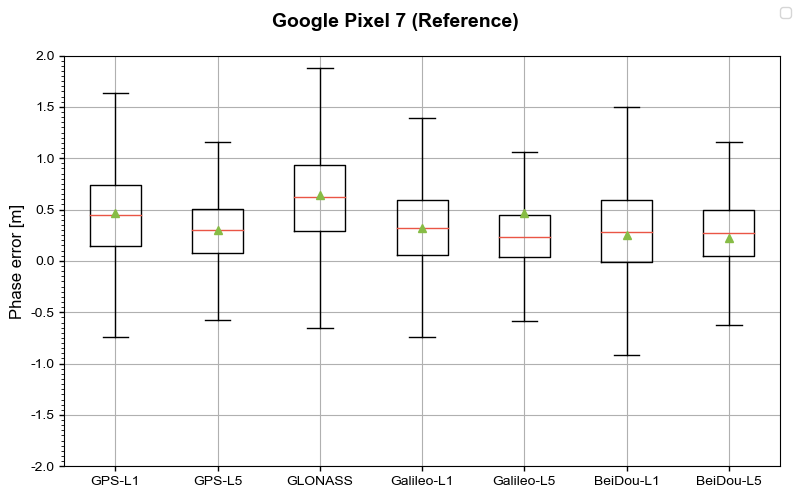

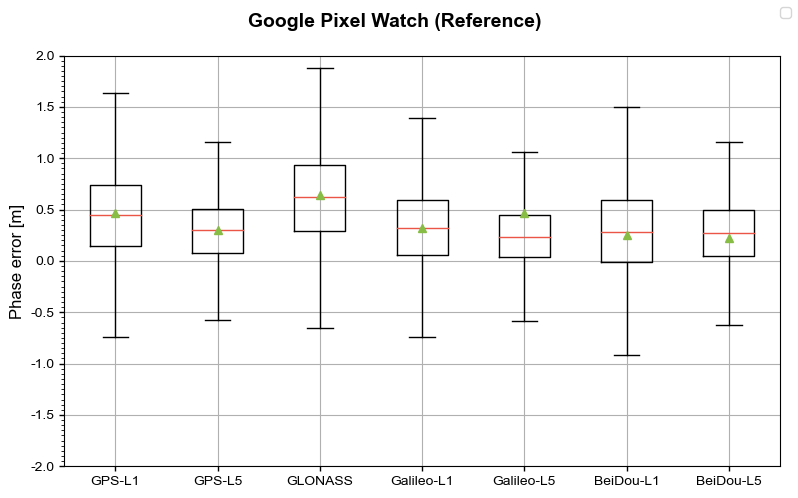

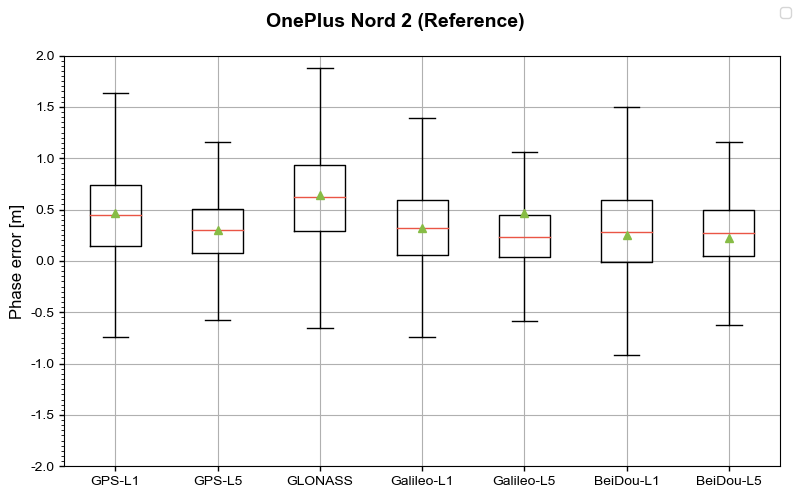

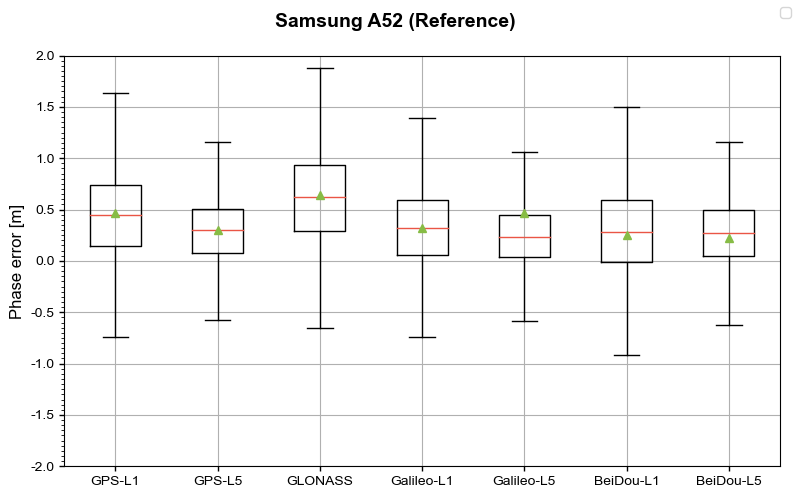

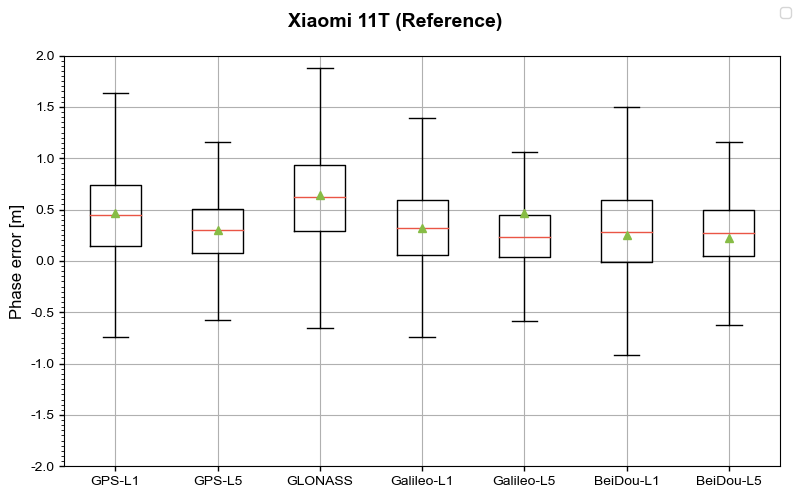

In [31]:

plotStatisticsDataBox(_logs, 
                      'phase_error', 
                      'Phase error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=2,
                      ticks=[0.05,0.5],
                      mode='ref')

In [32]:
stats = []
_logs = copy.deepcopy(logs)
for log in _logs:
    log.raw[list(misc.GnssStateADR_Str.values())] = log.raw.apply(lambda row: misc.getSplitState(row['AccumulatedDeltaRangeState'], bits=5, type='phase'), axis='columns', result_type='expand')
    count = log.raw[list(misc.GnssStateADR_Str.values())].count()
    stats.append(log.raw[list(misc.GnssStateADR_Str.values())].sum().div(count))
stats = pd.concat(stats, keys=device_list, axis=1)
stats

Pixel 7  Pixel Watch    Nord 2  A52       11T
ADR_UNKNOWN              0.000000     0.000000  0.000000  0.0  0.000000
ADR_VALID                0.367352     0.146101  0.576285  0.0  0.645057
ADR_RESET                0.000000     0.000026  0.000000  0.0  0.000000
ADR_CYCLE_SLIP           0.067645     0.033569  0.294610  0.0  0.317234
ADR_HALF_CYCLE_RESOLVED  0.293595     0.066564  0.357974  0.0  0.390879
ADR_HALF_CYCLE_REPORTED  1.000000     1.000000  1.000000  1.0  1.000000

C/N0

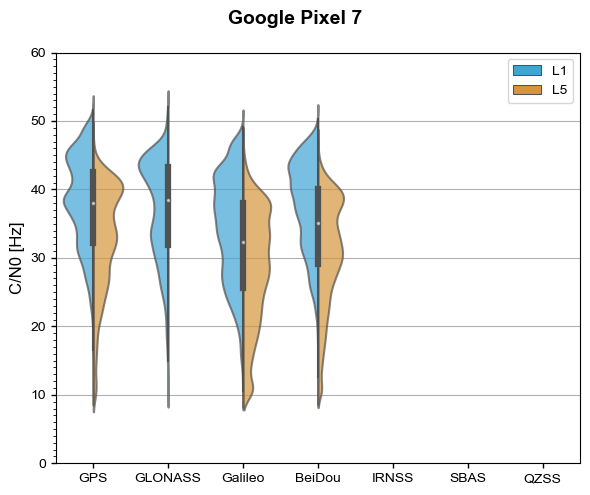

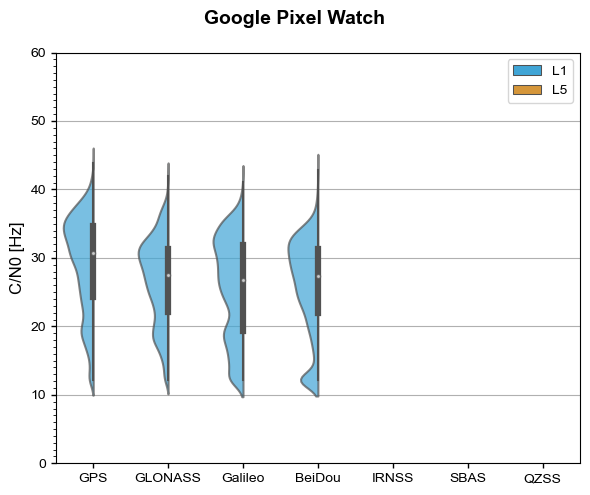

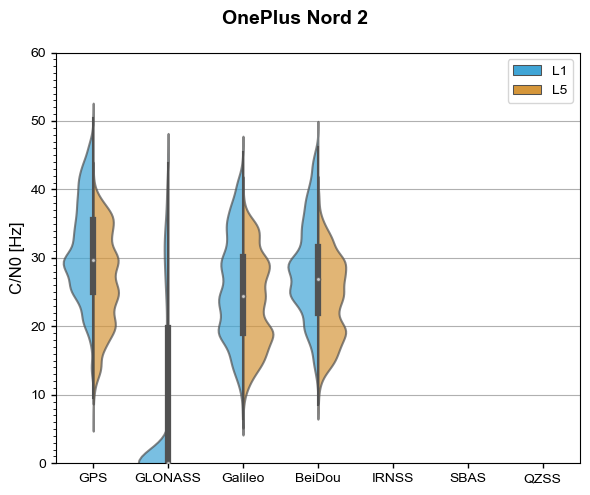

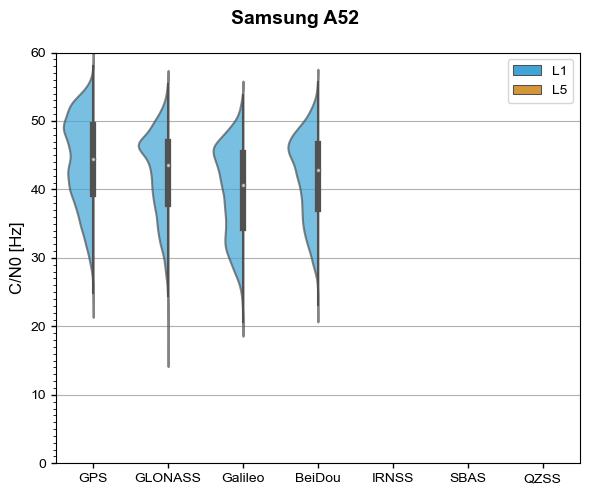

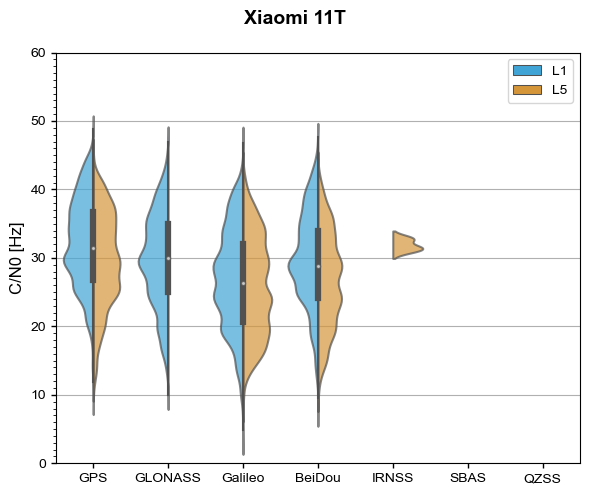

In [33]:
_logs = copy.deepcopy(logs)
plotStatisticsDataViolin(
    _logs, 
    'Cn0DbHz', 
    'C/N0 [Hz]', 
    ('G', 'R', 'E', 'C', 'I', 'S', 'J'), 
    ('L1', 'L5'),
    lim=60,
    ticks=[1,10])

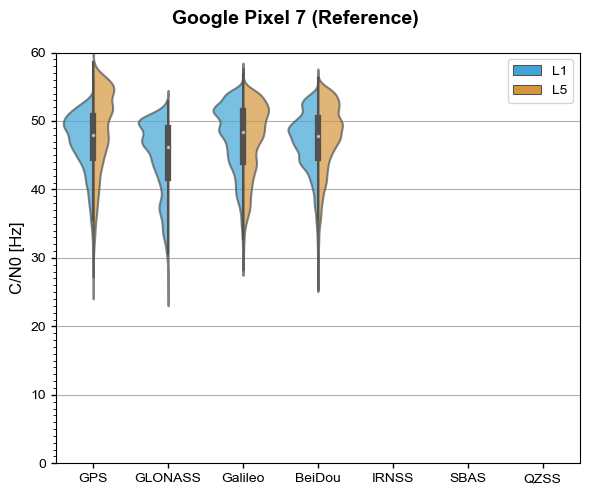

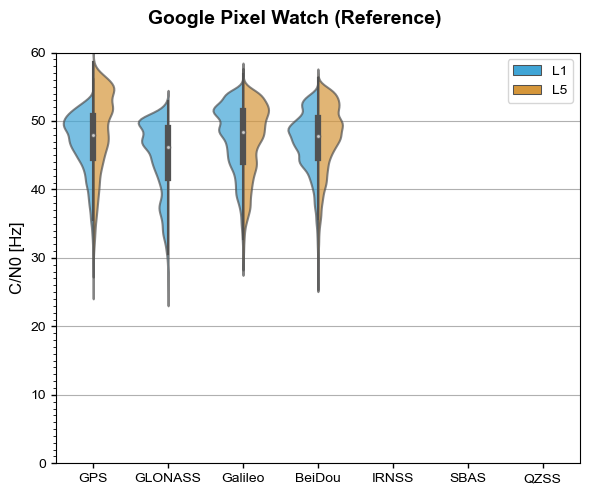

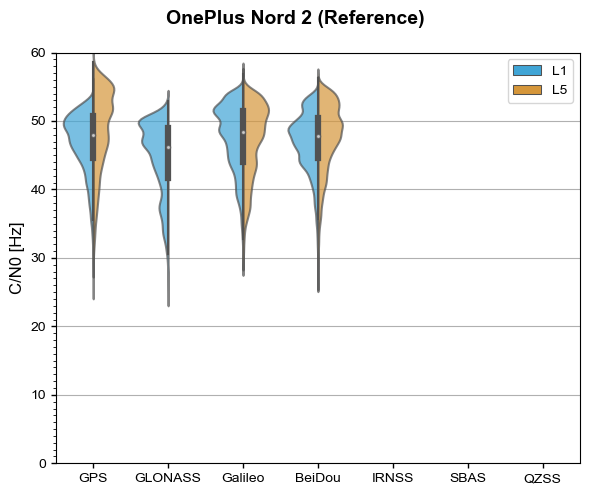

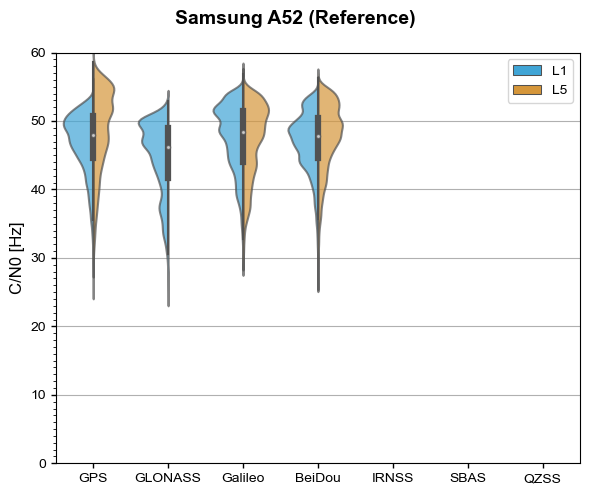

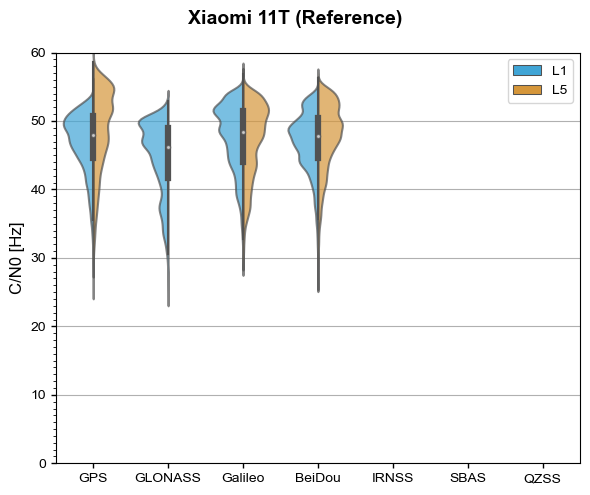

In [34]:
plotStatisticsDataViolin(
    _logs, 
    'snr', 
    'C/N0 [Hz]', 
    ('G', 'R', 'E', 'C', 'I', 'S', 'J'), 
    ('L1', 'L5'),
    lim=60,
    ticks=[1,10],
    mode='ref')